In [6]:
from datasets import load_dataset
import torchvision.transforms.functional as TF

import logging
logging.disable(logging.WARNING)

x, y = 'image', 'label'
name = 'fashion_mnist'
dsd = load_dataset(name, verification_mode="no_checks")

bs = 256

def transform(b):
    return {
        x: [TF.to_tensor(o) for o in b[x]],
        y: b[y]
    }

tds = dsd.with_transform(transform)

  0%|          | 0/2 [00:00<?, ?it/s]

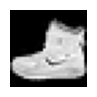

In [12]:
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['image.cmap'] = 'gray'


def show_image(im, figsize=(4, 4)):
    if type(im) == torch.Tensor:
        im = im.detach().cpu()
        if len(im.shape) == 3 and im.shape[0] < 5:
            im = im.permute(1, 2, 0)

    _, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ds = tds['train']
img = ds[0]['image']
show_image(img, figsize=(1, 1))